In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Manager view
- Supply and demand between teacher and student by time and subject
- hiring cost for teacher
- profit from student.

## 1. supply and demand.

In [6]:
student_df = pd.read_csv("../../data/mvp/input/student_df_formated.csv")
teacher_df = pd.read_csv("../../data/mvp/input/teacher_df_formated.csv")
timetable_df = pd.read_csv("../../data/mvp/output/result.csv")


In [3]:
# Different between supply and demand

### 1.1. suply and demand by time

<AxesSubplot: xlabel='day_of_week', ylabel='Count'>

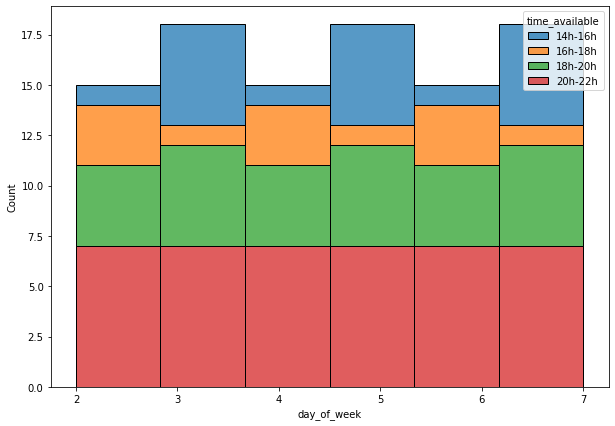

In [7]:
## student request slot
student_df = student_df.sort_values(by="time_available")
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=student_df, x="day_of_week", bins=6, hue="time_available", multiple="stack", ax=ax)

In [168]:
std_req = {}
for day in range(2, 8, 1): 
    tmp = [0,0,0,0]
    std_req[day] = tmp
    
    if "14h-16h" in student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts():
        std_req[day][0] = student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["14h-16h"] 
    if "16h-18h" in student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts():
        std_req[day][1] = student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["16h-18h"]
    if "18h-20h" in student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts():
        std_req[day][2] = student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["18h-20h"]
    if "20h-22h" in student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts():
        std_req[day][3] = student_df[(student_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["20h-22h"]

In [169]:
teacher_sup = {}
ratio = 3 # 1 teacher can handle 3 student.

for day in range(2, 8, 1):
    tmp = [0,0,0,0]
    teacher_sup[day] = tmp
    
    if "14h-16h" in teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts():
        teacher_sup[day][0] = teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["14h-16h"] * ratio
    if "16h-18h" in teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts():
        teacher_sup[day][1] = teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["16h-18h"] * ratio
    if "18h-20h" in teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts():
        teacher_sup[day][2] = teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["18h-20h"] * ratio
    if "20h-22h" in teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts():
        teacher_sup[day][3] = teacher_df[(teacher_df["day_of_week"] == day)]["time_available"].value_counts(dropna=False)["20h-22h"] * ratio

In [170]:
teacher_slot0 = [teacher_sup[num_slot][0] for num_slot in teacher_sup]
teacher_slot1 = [teacher_sup[num_slot][1] for num_slot in teacher_sup]
teacher_slot2 = [teacher_sup[num_slot][2] for num_slot in teacher_sup]
teacher_slot3 = [teacher_sup[num_slot][3] for num_slot in teacher_sup]

std_slot0 = [std_req[num_slot][0] for num_slot in std_req]
std_slot1 = [std_req[num_slot][1] for num_slot in std_req]
std_slot2 = [std_req[num_slot][2] for num_slot in std_req]
std_slot3 = [std_req[num_slot][3] for num_slot in std_req]


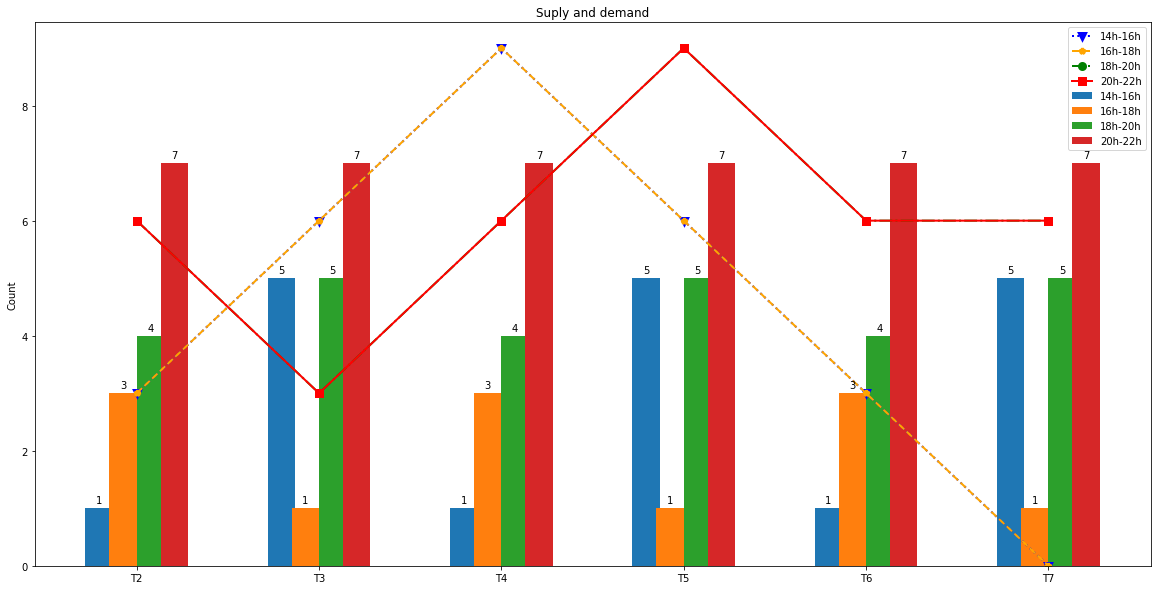

In [203]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['T2', 'T3', 'T4', 'T5', 'T6', 'T7']

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width/2.9, std_slot0, width/4, label='14h-16h')
rects2 = ax.bar(x - width/8, std_slot1, width/4, label='16h-18h')
rects3 = ax.bar(x + width/8, std_slot2, width/4, label='18h-20h')
rects4 = ax.bar(x + width/2.9, std_slot3, width/4, label='20h-22h')

ax.plot(labels, teacher_slot0, color ='blue', marker="v", markeredgewidth=3, linewidth = 2, linestyle = ":", label = "14h-16h")
ax.plot(labels, teacher_slot1, color = "orange", marker="*", markeredgewidth=3, linewidth = 2, linestyle = "--", label = "16h-18h")
ax.plot(labels, teacher_slot2, color = "green", marker="o", markeredgewidth=3, linewidth = 2, linestyle = "-.", label = "18h-20h")
ax.plot(labels, teacher_slot3, color = "red", marker="s", markeredgewidth=3, linewidth = 2, linestyle = "-", label = "20h-22h")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Suply and demand')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)



plt.show()

<AxesSubplot: xlabel='day_of_week', ylabel='Count'>

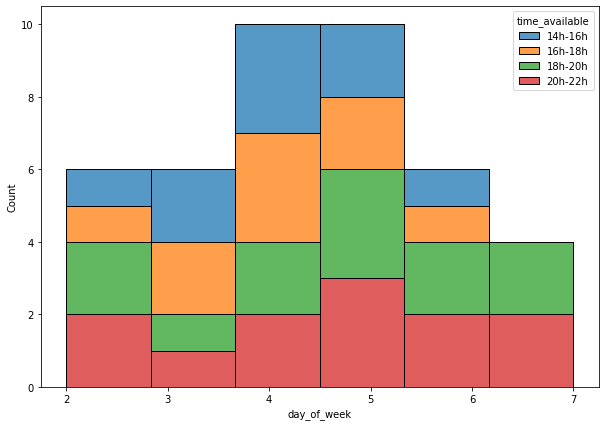

In [28]:
## teacher available at slot

fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=teacher_df, x="day_of_week", bins=6, hue="time_available", multiple="stack", ax=ax)

### 1.2. suply and demand by subject

<AxesSubplot: xlabel='day_of_week', ylabel='Count'>

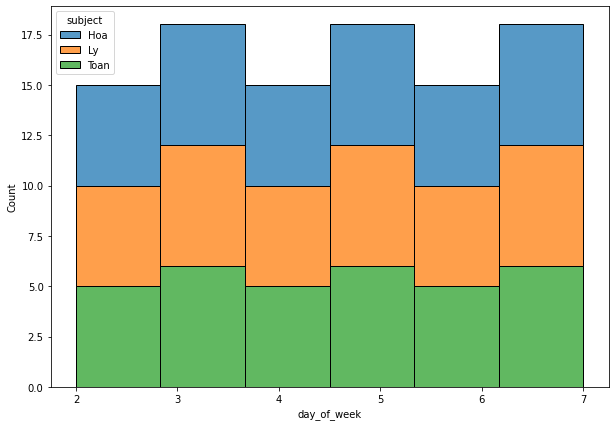

In [205]:
student_df = student_df.sort_values(by="subject")
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=student_df, x="day_of_week", bins=6, hue="subject", multiple="stack")

In [206]:
std_sub_req = {}
for day in range(2, 8, 1): 
    tmp = [0,0,0]
    std_sub_req[day] = tmp

    if "Toan" in student_df[(student_df["day_of_week"] == day)]["subject"].value_counts():
        std_sub_req[day][0] = student_df[(student_df["day_of_week"] == day)]["subject"].value_counts(dropna=False)["Toan"] 
    if "Ly" in student_df[(student_df["day_of_week"] == day)]["subject"].value_counts():
        std_sub_req[day][1] = student_df[(student_df["day_of_week"] == day)]["subject"].value_counts(dropna=False)["Ly"]
    if "Hoa" in student_df[(student_df["day_of_week"] == day)]["subject"].value_counts():
        std_sub_req[day][2] = student_df[(student_df["day_of_week"] == day)]["subject"].value_counts(dropna=False)["Hoa"]

In [212]:
teacher_sub_sup = {}
ratio = 3 # 1 teacher can teach 3 student

for day in range(2, 8, 1): 
    tmp = [0,0,0]
    teacher_sub_sup[day] = tmp

    if "Toan" in teacher_df[(teacher_df["day_of_week"] == day)]["subject"].value_counts():
        teacher_sub_sup[day][0] = teacher_df[(teacher_df["day_of_week"] == day)]["subject"].value_counts(dropna=False)["Toan"] * ratio 
    if "Ly" in teacher_df[(teacher_df["day_of_week"] == day)]["subject"].value_counts():
        teacher_sub_sup[day][1] = teacher_df[(teacher_df["day_of_week"] == day)]["subject"].value_counts(dropna=False)["Ly"] * ratio
    if "Hoa" in teacher_df[(teacher_df["day_of_week"] == day)]["subject"].value_counts():
        teacher_sub_sup[day][2] = teacher_df[(teacher_df["day_of_week"] == day)]["subject"].value_counts(dropna=False)["Hoa"] * ratio

In [213]:
teacher_sub_slot0 = [teacher_sub_sup[num_slot][0] for num_slot in teacher_sub_sup]
teacher_sub_slot1 = [teacher_sub_sup[num_slot][1] for num_slot in teacher_sub_sup]
teacher_sub_slot2 = [teacher_sub_sup[num_slot][2] for num_slot in teacher_sub_sup]

std_sub_slot0 = [std_sub_req[num_slot][0] for num_slot in std_sub_req]
std_sub_slot1 = [std_sub_req[num_slot][1] for num_slot in std_sub_req]
std_sub_slot2 = [std_sub_req[num_slot][2] for num_slot in std_sub_req]

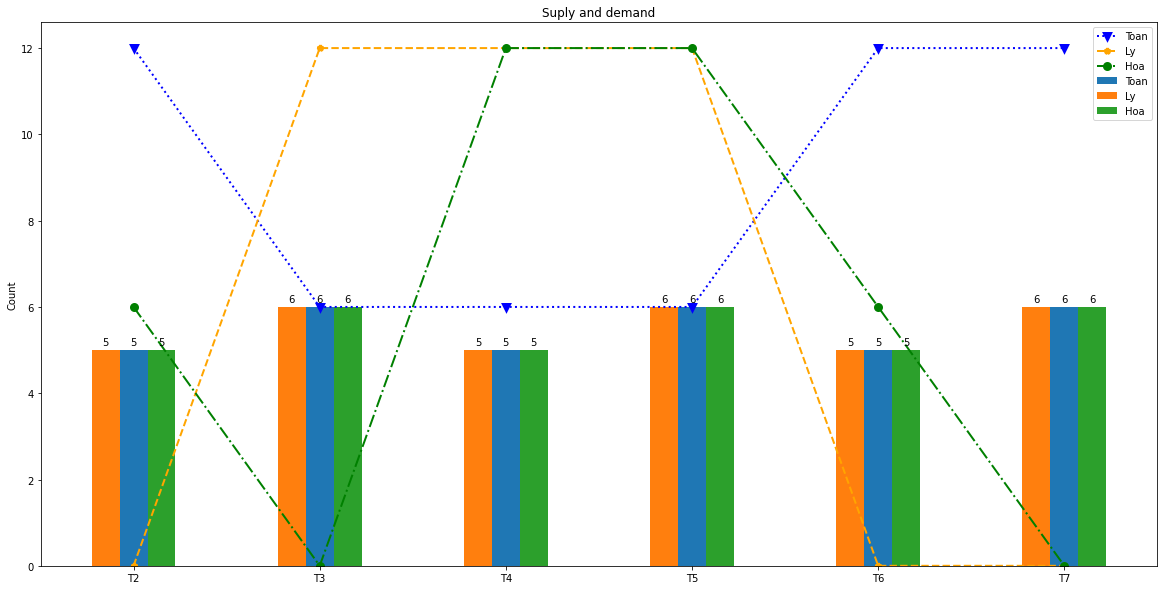

In [214]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['T2', 'T3', 'T4', 'T5', 'T6', 'T7']

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x, std_sub_slot0, width/4, label='Toan')
rects2 = ax.bar(x - width/4, std_sub_slot1, width/4, label='Ly')
rects3 = ax.bar(x + width/4, std_sub_slot2, width/4, label='Hoa')

ax.plot(labels, teacher_sub_slot0, color ='blue', marker="v", markeredgewidth=3, linewidth = 2, linestyle = ":", label = "Toan")
ax.plot(labels, teacher_sub_slot1, color = "orange", marker="*", markeredgewidth=3, linewidth = 2, linestyle = "--", label = "Ly")
ax.plot(labels, teacher_sub_slot2, color = "green", marker="o", markeredgewidth=3, linewidth = 2, linestyle = "-.", label = "Hoa")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Suply and demand')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)


plt.show()

<AxesSubplot: xlabel='day_of_week', ylabel='Count'>

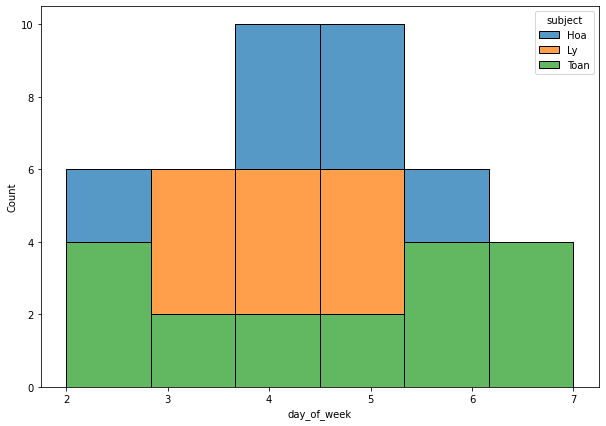

In [215]:
teacher_df = teacher_df.sort_values(by="subject")
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=teacher_df, x="day_of_week", bins=6, hue="subject", multiple="stack")

# Teacher view
- Labor law.
    - working hours (after get scheduled) 

## 1. working hours

<AxesSubplot: xlabel='teacher', ylabel='Count'>

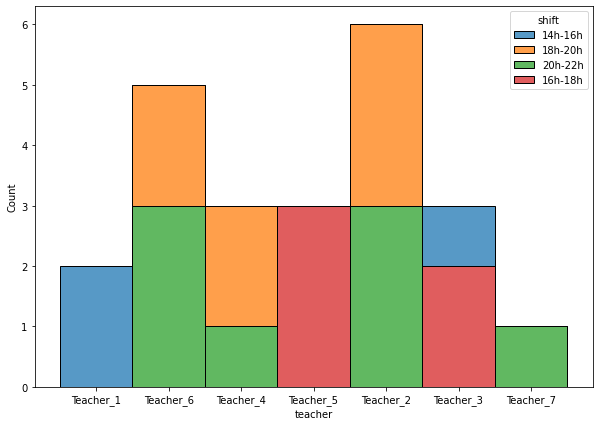

In [216]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=timetable_df, x="teacher", bins=7, hue="shift", multiple="stack", ax=ax)

<AxesSubplot: xlabel='day', ylabel='Count'>

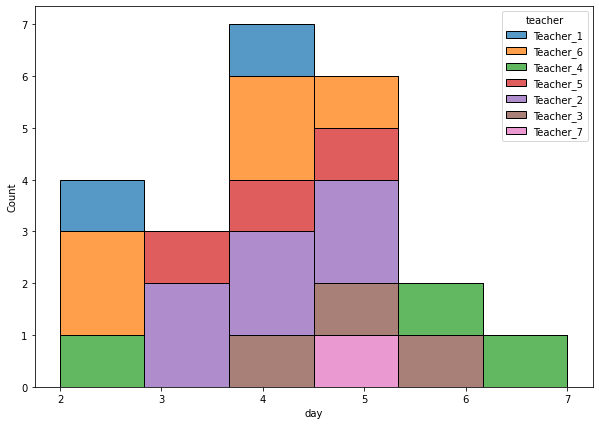

In [217]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=timetable_df, x="day", bins=6, hue="teacher", multiple="stack", ax=ax)

# Student view

## 1. refer teacher.

In [218]:
join = timetable_df
re = join.merge(student_df, how="inner", \
           left_on=["student", "day", "shift", "subject"], \
           right_on=["Student", "day_of_week", "time_available", "subject"])
re["is_refer_teacher"] = re.apply(lambda row: 1 if row["refer teacher"] == row["teacher"] else 0, axis=1)

<AxesSubplot: xlabel='is_refer_teacher', ylabel='Count'>

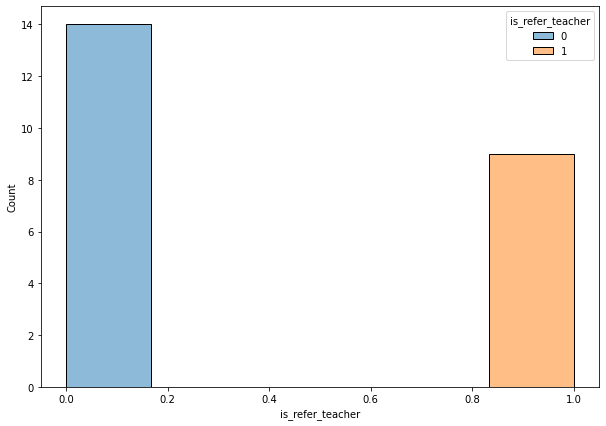

In [219]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=re, x="is_refer_teacher", fill=True, hue="is_refer_teacher", ax=ax, kde=True)